<a href="https://colab.research.google.com/github/vihanga-induwara/Basic-TechExpo-Event-Manager/blob/main/new_CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load and Import Libraries**

# **2. Load the Dataset**

In [151]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/vihanga-induwara/Bank-Marketing/main/bank%2Bmarketing/bank-additional/bank-additional/bank-additional-full.csv", sep=";")

# **3. Explore the Dataset**

## **Inspect the first few rows with .head().**

In [152]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [153]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## **Check for missing values using .isnull().sum()**

In [154]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## **Check for class imbalance using .value_counts() on the target variable.**

In [155]:
data['y'].value_counts()

,count
y,
no,36548
yes,4640


## **Use .describe() for statistical overview of the dataset.**

In [156]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **Examine feature types (categorical, continuous) using .dtypes.**

In [157]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


# **4. Data Preprocessing**

## **4.1Each colum Data Preprocessing**

### **01.age - Client's age (numeric)**

In [158]:
data["age"].value_counts()

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


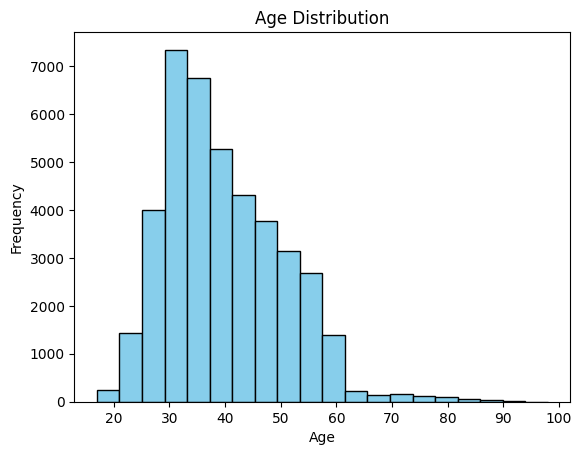

In [159]:
import matplotlib.pyplot as plt

# Basic histogram for age distribution
plt.hist(data["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [160]:
import pandas as pd

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter the data to exclude outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data.shape}")

Lower Bound: 9.5, Upper Bound: 69.5
Original data shape: (40719, 21)
Data shape after removing outliers: (40719, 21)


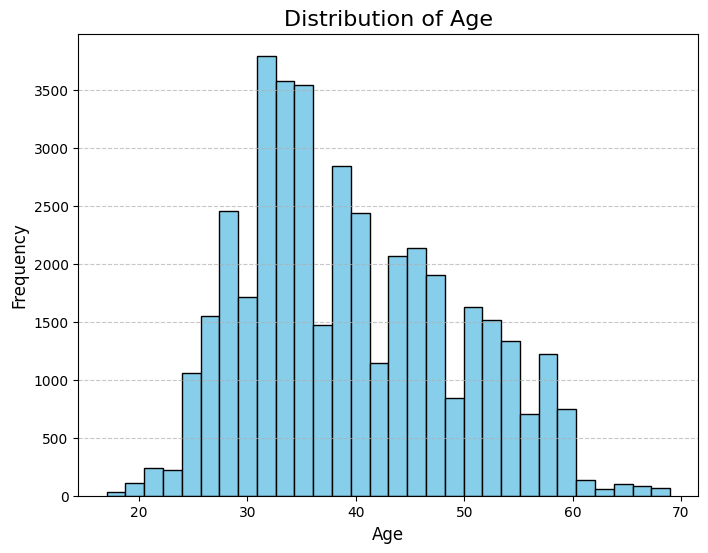

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [162]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler instance
scaler = MinMaxScaler()

# Normalize the 'age' column
data['age'] = scaler.fit_transform(data[['age']])

# Display the first few rows of the normalized column
print(data[['age']].head())

        age
0  0.750000
1  0.769231
2  0.384615
3  0.442308
4  0.750000


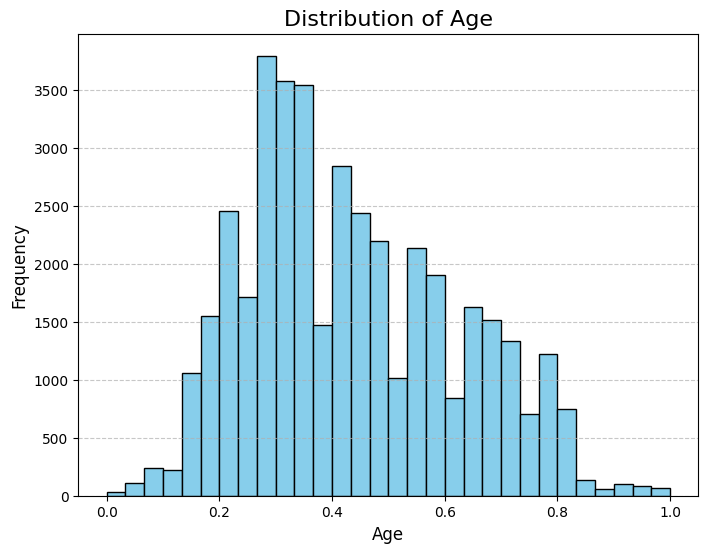

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **02.job - Type of job (categorical).**

In [164]:
data["job"].value_counts()

,count
job,
admin.,10414
blue-collar,9251
technician,6742
services,3969
management,2918
entrepreneur,1456
self-employed,1420
retired,1301
housemaid,1035


In [165]:
import pandas as pd

data_encoded = pd.get_dummies(data['job'], prefix='job', drop_first=False)

data = pd.concat([data, data_encoded], axis=1)

# Display the first few rows of the updated dataframe
print(data.head(2))

        age        job  marital    education  default housing loan    contact  \
0  0.750000  housemaid  married     basic.4y       no      no   no  telephone   
1  0.769231   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  ...  job_entrepreneur  job_housemaid  job_management  \
0   may         mon  ...             False           True           False   
1   may         mon  ...             False          False           False   

   job_retired job_self-employed  job_services  job_student  job_technician  \
0        False             False         False        False           False   
1        False             False          True        False           False   

   job_unemployed  job_unknown  
0           False        False  
1           False        False  

[2 rows x 33 columns]


In [166]:
# Drop the 'job' column in-place
data.drop(columns=['job'], inplace=True)

# Verify if the column is removed
print(data.head())

        age  marital    education  default housing loan    contact month  \
0  0.750000  married     basic.4y       no      no   no  telephone   may   
1  0.769231  married  high.school  unknown      no   no  telephone   may   
2  0.384615  married  high.school       no     yes   no  telephone   may   
3  0.442308  married     basic.6y       no      no   no  telephone   may   
4  0.750000  married  high.school       no      no  yes  telephone   may   

  day_of_week  duration  ...  job_entrepreneur  job_housemaid  job_management  \
0         mon       261  ...             False           True           False   
1         mon       149  ...             False          False           False   
2         mon       226  ...             False          False           False   
3         mon       151  ...             False          False           False   
4         mon       307  ...             False          False           False   

  job_retired  job_self-employed  job_services  job_stud

### **03.marital - Marital status (categorical).**

In [167]:
data["marital"].value_counts()

,count
marital,
married,24610
single,11553
divorced,4476
unknown,80


In [168]:
# Replace unknown with the most frequent category
most_frequent_marital = data['marital'].mode()[0]
data['marital'].replace('unknown', most_frequent_marital, inplace=True)

<ipython-input-168-e089c0016540>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['marital'].replace('unknown', most_frequent_marital, inplace=True)


In [169]:
data["marital"].value_counts()

,count
marital,
married,24690
single,11553
divorced,4476


In [170]:
# One-hot encode the 'marital' column
data = pd.get_dummies(data, columns=['marital'], drop_first=True)

# Check the result
print(data.head())

        age    education  default housing loan    contact month day_of_week  \
0  0.750000     basic.4y       no      no   no  telephone   may         mon   
1  0.769231  high.school  unknown      no   no  telephone   may         mon   
2  0.384615  high.school       no     yes   no  telephone   may         mon   
3  0.442308     basic.6y       no      no   no  telephone   may         mon   
4  0.750000  high.school       no      no  yes  telephone   may         mon   

   duration  campaign  ...  job_management  job_retired job_self-employed  \
0       261         1  ...           False        False             False   
1       149         1  ...           False        False             False   
2       226         1  ...           False        False             False   
3       151         1  ...           False        False             False   
4       307         1  ...           False        False             False   

   job_services  job_student  job_technician  job_unemployed  

### **04.education - Education level (categorical).**

In [171]:
data["education"].value_counts()

,count
education,
university.degree,12105
high.school,9481
basic.9y,6018
professional.course,5201
basic.4y,3935
basic.6y,2279
unknown,1683
illiterate,17


In [172]:
# Find the most frequent category in the 'education' column
most_frequent_education = data['education'].mode()[0]

# Replace 'unknown' with the most frequent category
data['education'] = data['education'].replace('unknown', most_frequent_education)

In [173]:
# Check the value counts after replacement
print(data['education'].value_counts())

education
university.degree      13788
high.school             9481
basic.9y                6018
professional.course     5201
basic.4y                3935
basic.6y                2279
illiterate                17
Name: count, dtype: int64


In [174]:
# One-hot encode the 'education' column
education_encoded = pd.get_dummies(data['education'], prefix='education')

# Join the one-hot encoded columns back to the original DataFrame
data = pd.concat([data, education_encoded], axis=1)

# Drop the original 'education' column
data.drop('education', axis=1, inplace=True)

# Print the updated DataFrame
print(data.head())

        age  default housing loan    contact month day_of_week  duration  \
0  0.750000       no      no   no  telephone   may         mon       261   
1  0.769231  unknown      no   no  telephone   may         mon       149   
2  0.384615       no     yes   no  telephone   may         mon       226   
3  0.442308       no      no   no  telephone   may         mon       151   
4  0.750000       no      no  yes  telephone   may         mon       307   

   campaign  pdays  ...  job_unknown marital_married  marital_single  \
0         1    999  ...        False            True           False   
1         1    999  ...        False            True           False   
2         1    999  ...        False            True           False   
3         1    999  ...        False            True           False   
4         1    999  ...        False            True           False   

   education_basic.4y  education_basic.6y  education_basic.9y  \
0                True               False    

### **05.default - Has credit in default? (binary).**

In [175]:
data["default"].value_counts()

,count
default,
no,32162
unknown,8554
yes,3


In [176]:
# Drop the 'default' column if it doesn't provide useful information
data = data.drop('default', axis=1)

# Check the remaining columns
print(data.columns)

Index(['age', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')


### **06.balance - Average yearly balance in euros (numeric).**

### **07.housing - Has housing loan? (binary).**

In [177]:
data["housing"].value_counts()

,count
housing,
yes,21319
no,18419
unknown,981


In [178]:
# Replace 'unknown' with the most frequent value ('yes')
data['housing'] = data['housing'].replace('unknown', 'yes')

# Check the updated value counts
print(data['housing'].value_counts())

housing
yes    22300
no     18419
Name: count, dtype: int64


In [179]:
# One-hot encode the 'housing' column
housing_encoded = pd.get_dummies(data['housing'], prefix='housing')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, housing_encoded], axis=1)

# Drop the original 'housing' column if it's no longer needed
data = data.drop(columns=['housing'])

# Check the updated dataframe
print(data.head())

        age loan    contact month day_of_week  duration  campaign  pdays  \
0  0.750000   no  telephone   may         mon       261         1    999   
1  0.769231   no  telephone   may         mon       149         1    999   
2  0.384615   no  telephone   may         mon       226         1    999   
3  0.442308   no  telephone   may         mon       151         1    999   
4  0.750000  yes  telephone   may         mon       307         1    999   

   previous     poutcome  ...  marital_single  education_basic.4y  \
0         0  nonexistent  ...           False                True   
1         0  nonexistent  ...           False               False   
2         0  nonexistent  ...           False               False   
3         0  nonexistent  ...           False               False   
4         0  nonexistent  ...           False               False   

   education_basic.6y  education_basic.9y  education_high.school  \
0               False               False                  F

### **08.loan - Has personal loan? (binary).**

In [180]:
data["loan"].value_counts()

,count
loan,
no,33560
yes,6178
unknown,981


In [181]:
# Replace 'unknown' with the most frequent value ('yes')
data['loan'] = data['loan'].replace('unknown', 'yes')

# Check the updated value counts
print(data['loan'].value_counts())

loan
no     33560
yes     7159
Name: count, dtype: int64


In [182]:
# One-hot encode the 'loan' column
loan_encoded = pd.get_dummies(data['loan'], prefix='loan')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, loan_encoded], axis=1)

# Drop the original 'loan' column if it's no longer needed
data = data.drop(columns=['loan'])

# Check the updated dataframe
print(data.head())

        age    contact month day_of_week  duration  campaign  pdays  previous  \
0  0.750000  telephone   may         mon       261         1    999         0   
1  0.769231  telephone   may         mon       149         1    999         0   
2  0.384615  telephone   may         mon       226         1    999         0   
3  0.442308  telephone   may         mon       151         1    999         0   
4  0.750000  telephone   may         mon       307         1    999         0   

      poutcome  emp.var.rate  ...  education_basic.6y  education_basic.9y  \
0  nonexistent           1.1  ...               False               False   
1  nonexistent           1.1  ...               False               False   
2  nonexistent           1.1  ...               False               False   
3  nonexistent           1.1  ...                True               False   
4  nonexistent           1.1  ...               False               False   

   education_high.school  education_illiterate edu

### **09.contact - Communication type for last contact (categorical).**

In [183]:
data["contact"].value_counts()

,count
contact,
cellular,25724
telephone,14995


In [184]:
# Drop the 'contact' column
data = data.drop(columns=['contact'])

# Check the updated dataframe
print(data.head())

        age month day_of_week  duration  campaign  pdays  previous  \
0  0.750000   may         mon       261         1    999         0   
1  0.769231   may         mon       149         1    999         0   
2  0.384615   may         mon       226         1    999         0   
3  0.442308   may         mon       151         1    999         0   
4  0.750000   may         mon       307         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  ...  education_basic.6y  \
0  nonexistent           1.1          93.994  ...               False   
1  nonexistent           1.1          93.994  ...               False   
2  nonexistent           1.1          93.994  ...               False   
3  nonexistent           1.1          93.994  ...                True   
4  nonexistent           1.1          93.994  ...               False   

   education_basic.9y  education_high.school education_illiterate  \
0               False                  False                False   
1 

### **10.day - Last contact day of the month (numeric).**

In [185]:
data["month"].value_counts()

,count
month,
may,13736
jul,7141
aug,6091
jun,5301
nov,4064
apr,2562
oct,648
sep,513
mar,503


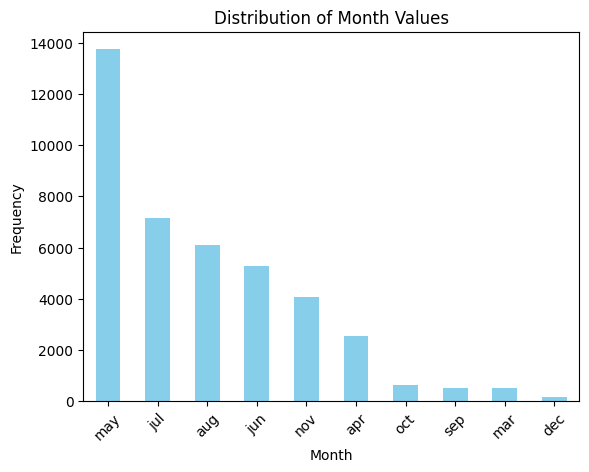

In [186]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'month' column
data['month'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Month Values')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [187]:
import pandas as pd

data = pd.get_dummies(data, columns=['month'], drop_first=False)

# Display the transformed data to check the result
print(data.head())

        age day_of_week  duration  campaign  pdays  previous     poutcome  \
0  0.750000         mon       261         1    999         0  nonexistent   
1  0.769231         mon       149         1    999         0  nonexistent   
2  0.384615         mon       226         1    999         0  nonexistent   
3  0.442308         mon       151         1    999         0  nonexistent   
4  0.750000         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  ...  month_apr  month_aug  \
0           1.1          93.994          -36.4  ...      False      False   
1           1.1          93.994          -36.4  ...      False      False   
2           1.1          93.994          -36.4  ...      False      False   
3           1.1          93.994          -36.4  ...      False      False   
4           1.1          93.994          -36.4  ...      False      False   

  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_

### **11.month - Last contact month (categorical).**

In [188]:
data["day_of_week"].value_counts()

,count
day_of_week,
thu,8522
mon,8426
wed,8052
tue,7980
fri,7739


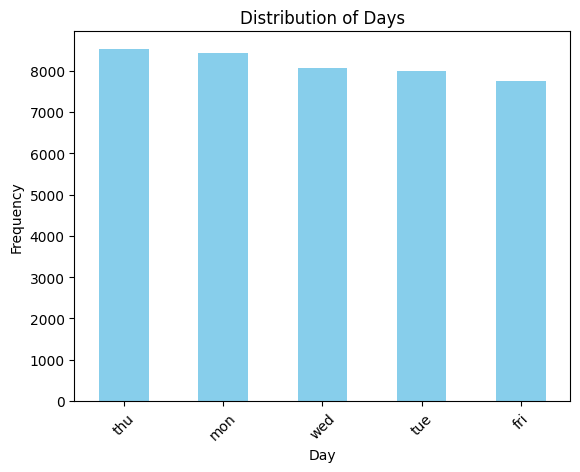

In [189]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'day_of_week' column
data['day_of_week'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [190]:
# Drop the 'day_of_week' column in-place
data.drop(columns=['day_of_week'], inplace=True)

# Verify if the column is removed
print(data.head())

        age  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0  0.750000       261         1    999         0  nonexistent           1.1   
1  0.769231       149         1    999         0  nonexistent           1.1   
2  0.384615       226         1    999         0  nonexistent           1.1   
3  0.442308       151         1    999         0  nonexistent           1.1   
4  0.750000       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_apr month_aug  \
0          93.994          -36.4      4.857  ...      False     False   
1          93.994          -36.4      4.857  ...      False     False   
2          93.994          -36.4      4.857  ...      False     False   
3          93.994          -36.4      4.857  ...      False     False   
4          93.994          -36.4      4.857  ...      False     False   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False   

### **12.duration - Last contact duration in seconds (numeric).**

In [191]:
data["duration"].value_counts()

,count
duration,
85,168
136,167
90,167
73,166
124,163
...,...
1275,1
1473,1
1432,1


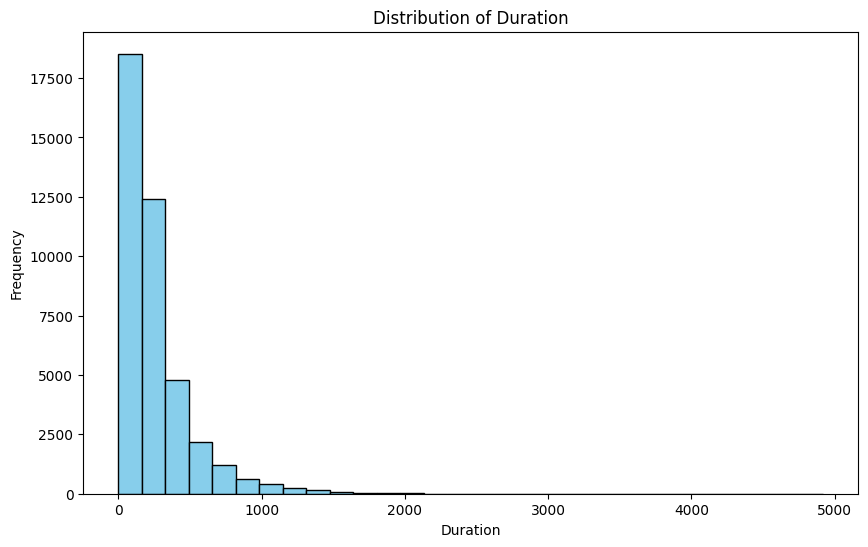

In [192]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [193]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['duration'] = scaler.fit_transform(data[['duration']])

# Check the result
print(data[['duration']].head())

   duration
0  0.053070
1  0.030297
2  0.045954
3  0.030704
4  0.062424


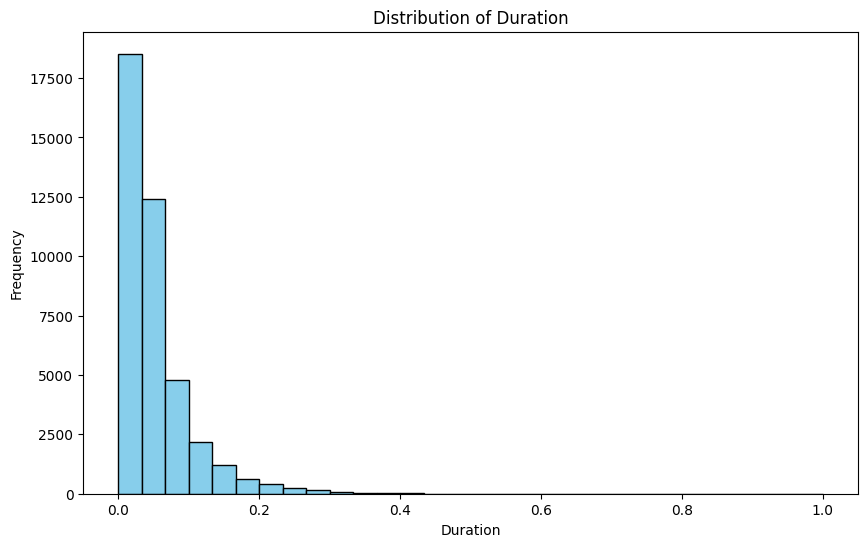

In [194]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

### **13.campaign - Number of contacts in this campaign (numeric)**

In [195]:
data["campaign"].value_counts()

,count
campaign,
1,17388
2,10444
3,5300
4,2631
5,1594
6,970
7,624
8,396
9,280


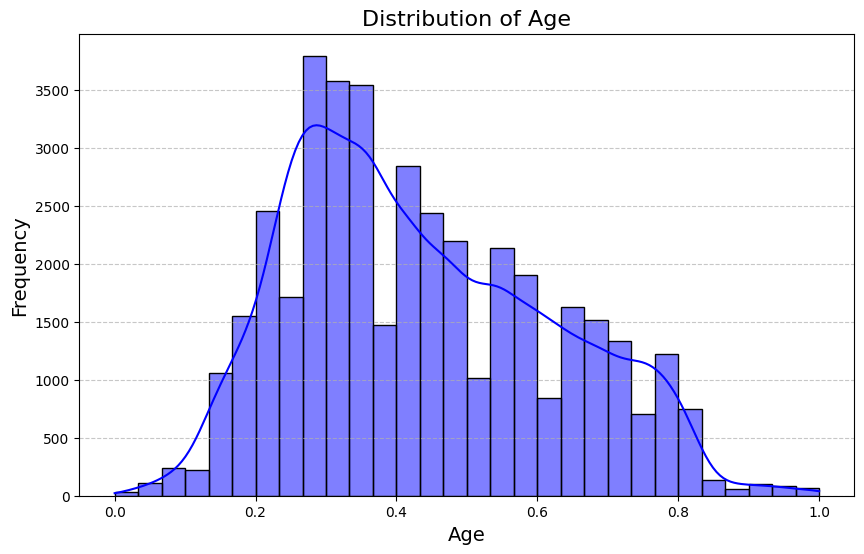

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')  # KDE adds a smooth curve
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [197]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['campaign'] = scaler.fit_transform(data[['campaign']])

# Check the result
print(data[['campaign']].head())

   campaign
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0


### **14.pdays - Days passed since the last contact in a previous campaign (numeric, -1 for no previous contact).**

In [198]:
data["pdays"].value_counts()

,count
pdays,
999,39302
3,399
6,382
4,111
9,60
2,60
12,56
7,55
10,51


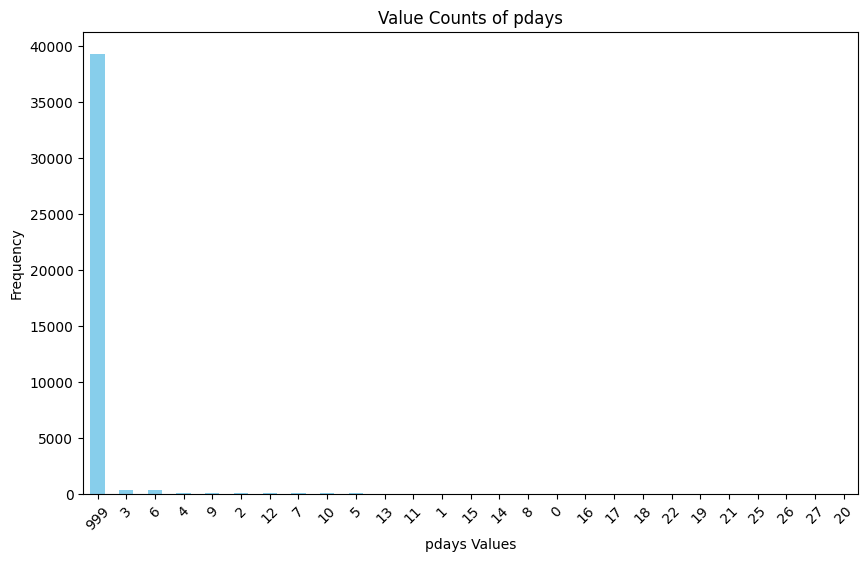

In [199]:
import matplotlib.pyplot as plt

# Get the value counts of the 'pdays' column
pdays_counts = data["pdays"].value_counts()

# Plot the result
pdays_counts.plot(kind='bar', figsize=(10,6), color='skyblue')

# Adding labels and title
plt.xlabel('pdays Values')
plt.ylabel('Frequency')
plt.title('Value Counts of pdays')
plt.xticks(rotation=45)
plt.show()

In [200]:
# Drop the 'pdays' column
# data = data.drop(columns=['pdays'])
# print(data.head())

### **15.previous - Number of contacts before the current campaign (numeric).**

In [201]:
data["previous"].value_counts()

,count
previous,
0,35296
1,4439
2,700
3,200
4,61
5,18
6,4
7,1


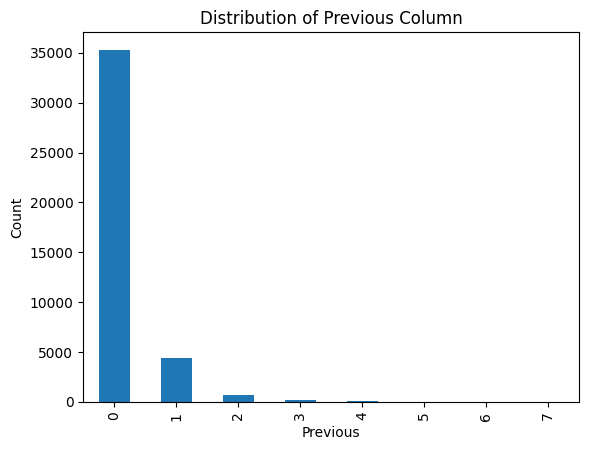

In [202]:
import matplotlib.pyplot as plt

# Plot the value counts for the 'previous' column
data['previous'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.xlabel('Previous')
plt.ylabel('Count')
plt.title('Distribution of Previous Column')

# Show the plot
plt.show()

In [203]:
# Drop the 'pdays' column
# data = data.drop(columns=['previous'])
# print(data.head())

### **16.poutcome - Outcome of the previous campaign (categorical).**

In [204]:
data["poutcome"].value_counts()

,count
poutcome,
nonexistent,35296
failure,4141
success,1282


In [205]:
import pandas as pd

# Perform one-hot encoding on 'poutcome'
one_hot_encoded = pd.get_dummies(data['poutcome'], prefix='poutcome')

# Add the one-hot encoded columns back to the original dataset
data = pd.concat([data, one_hot_encoded], axis=1)

# Display counts for the one-hot encoded columns
print("One-Hot Encoded Counts:")
print(one_hot_encoded.sum())


One-Hot Encoded Counts:
poutcome_failure         4141
poutcome_nonexistent    35296
poutcome_success         1282
dtype: int64


### **17.cons.price.idx - Numeric: Consumer price index.**

In [206]:
data["cons.price.idx"].value_counts()

,count
cons.price.idx,
93.994,7763
93.918,6685
92.893,5785
93.444,5175
94.465,4374
93.200,3616
93.075,2418
92.963,710
92.201,704


### **18.cons.conf.idx - Numeric: Consumer confidence index.**

In [207]:
data["cons.conf.idx"].value_counts()

,count
cons.conf.idx,
-36.4,7763
-42.7,6685
-46.2,5785
-36.1,5175
-41.8,4374
-42.0,3616
-47.1,2418
-40.8,710
-31.4,704


### **19.emp.var.rate - Numeric: Employment variation rate.**

In [208]:
data["emp.var.rate"].value_counts()

,count
emp.var.rate,
1.4,16234
-1.8,9038
1.1,7763
-0.1,3683
-2.9,1591
-3.4,949
-1.7,708
-1.1,593
-3.0,150


### **20.euribor3m - Numeric: Euribor 3-month rate.**

In [209]:
data["euribor3m"].value_counts()

,count
euribor3m,
4.857,2868
4.962,2613
4.963,2487
4.961,1902
4.856,1210
...,...
3.743,1
3.282,1
3.669,1


### **21.nr.employed - Numeric: Number of employees.**

In [210]:
data["nr.employed"].value_counts()

,count
nr.employed,
5228.1,16234
5099.1,8457
5191.0,7763
5195.8,3683
5076.2,1591
5017.5,949
4991.6,708
4963.6,593
5008.7,581


### **22.y - Client subscribed to a term deposit? (binary).**

In [211]:
data["y"].value_counts()

,count
y,
no,36300
yes,4419


In [212]:
import pandas as pd

data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [213]:
data["y"].value_counts()

,count
y,
0,36300
1,4419


## **4.2 Encode Categorical Variables**

## **4.3 Feature Engineering**

In [214]:
data.dtypes

,0
age,float64
duration,float64
campaign,float64
pdays,int64
previous,int64
poutcome,object
emp.var.rate,float64
cons.price.idx,float64
cons.conf.idx,float64
euribor3m,float64


### **4.3.1 Feature Extraction (Principal Component Analysis (PCA))**

In [215]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a DataFrame for the relevant columns
data_pca = data[['pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']]

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Apply PCA - reducing to 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_scaled)

# Add the PCA result as a new column in the dataset
data['pca_1'] = pca_result

# Drop the original columns (pdays, previous, and the one-hot encoded columns)
data.drop(columns=['pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'], inplace=True)

# Display the first few rows of the updated dataset
print(data.head())


        age  duration  campaign     poutcome  emp.var.rate  cons.price.idx  \
0  0.750000  0.053070       0.0  nonexistent           1.1          93.994   
1  0.769231  0.030297       0.0  nonexistent           1.1          93.994   
2  0.384615  0.045954       0.0  nonexistent           1.1          93.994   
3  0.442308  0.030704       0.0  nonexistent           1.1          93.994   
4  0.750000  0.062424       0.0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_aug  month_dec  \
0          -36.4      4.857       5191.0  0  ...      False      False   
1          -36.4      4.857       5191.0  0  ...      False      False   
2          -36.4      4.857       5191.0  0  ...      False      False   
3          -36.4      4.857       5191.0  0  ...      False      False   
4          -36.4      4.857       5191.0  0  ...      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0      False   

In [216]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Select the columns for PCA
pca_columns = ['cons.price.idx', 'cons.conf.idx', 'emp.var.rate', 'euribor3m', 'nr.employed']
pca_data = data[pca_columns]

# Step 2: Standardize the data (PCA requires standardization)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Step 3: Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component for pca_02
data['pca_02'] = pca.fit_transform(pca_data_scaled)

# Step 4: Drop the original columns
data = data.drop(columns=pca_columns)

# Display the updated data
print(data.head())

        age  duration  campaign     poutcome  y  job_admin.  job_blue-collar  \
0  0.750000  0.053070       0.0  nonexistent  0       False            False   
1  0.769231  0.030297       0.0  nonexistent  0       False            False   
2  0.384615  0.045954       0.0  nonexistent  0       False            False   
3  0.442308  0.030704       0.0  nonexistent  0        True            False   
4  0.750000  0.062424       0.0  nonexistent  0       False            False   

   job_entrepreneur  job_housemaid  job_management  ...  month_dec  month_jul  \
0             False           True           False  ...      False      False   
1             False          False           False  ...      False      False   
2             False          False           False  ...      False      False   
3             False          False           False  ...      False      False   
4             False          False           False  ...      False      False   

   month_jun  month_mar  month_m

### **4.3.2 Feature Selection:**

## **4.4 Normalize/Scale Numerical Features**

In [217]:
data.dtypes

,0
age,float64
duration,float64
campaign,float64
poutcome,object
y,int64
job_admin.,bool
job_blue-collar,bool
job_entrepreneur,bool
job_housemaid,bool
job_management,bool


In [218]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the updated data
print(data[numeric_columns].head())


        age  duration  campaign  pca_1    pca_02
0  0.750000  0.053070       0.0    0.0  0.898881
1  0.769231  0.030297       0.0    0.0  0.898881
2  0.384615  0.045954       0.0    0.0  0.898881
3  0.442308  0.030704       0.0    0.0  0.898881
4  0.750000  0.062424       0.0    0.0  0.898881


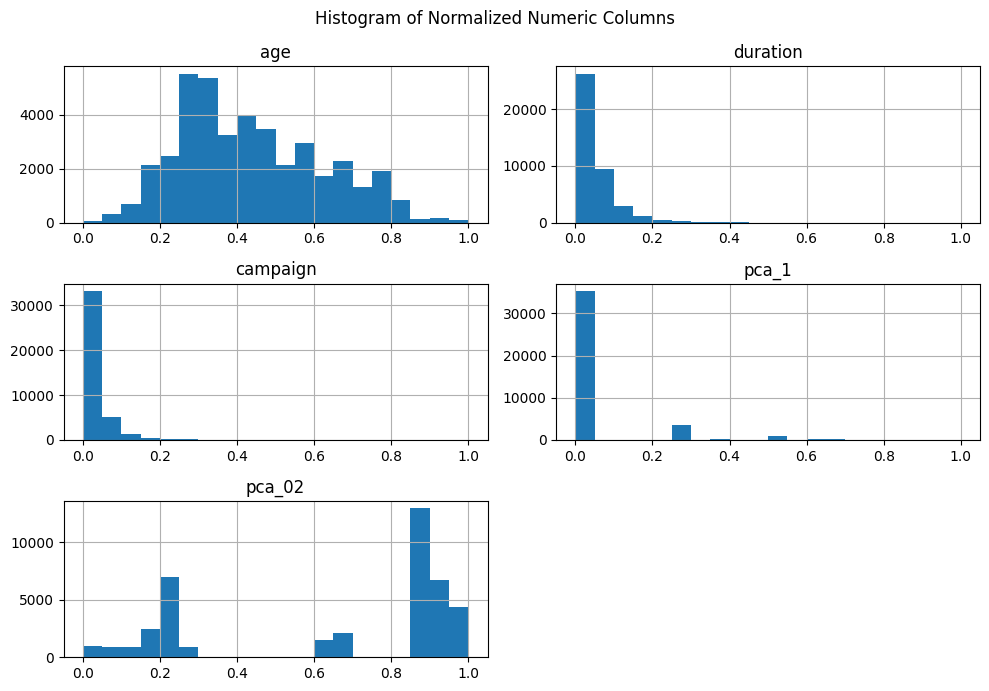

In [219]:
import matplotlib.pyplot as plt

# Select numeric columns for normalization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Plot histograms for each numeric column
data[numeric_columns].hist(bins=20, figsize=(10, 7))
plt.suptitle('Histogram of Normalized Numeric Columns')
plt.tight_layout()
plt.show()


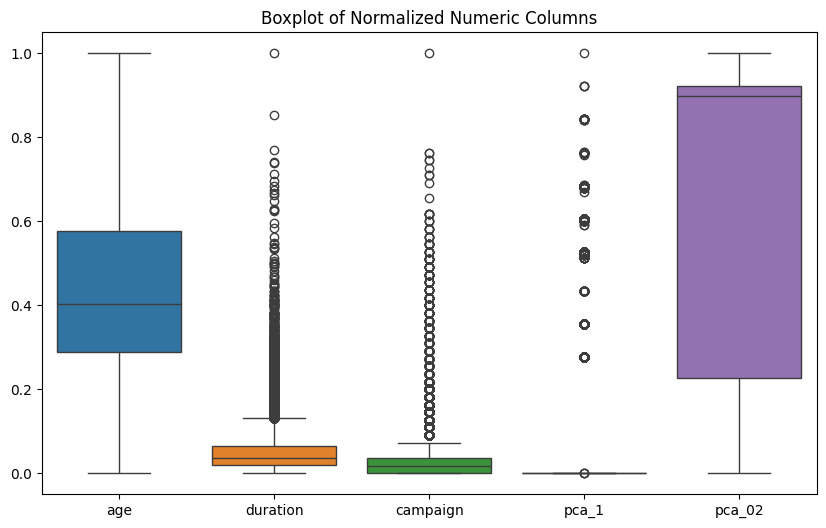

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for visualization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Create a boxplot to visualize distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Normalized Numeric Columns')
plt.show()


## **4.1 Handle Class Imbalance**

### **oversampling the minority class**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: could not convert string to float: 'nonexistent'

### **undersampling the majority class**

## **4.5 Split the Dataset**

# **5. Visualize the Data**

5.1 Correlation Heatmap

5.2 Feature Distribution

5.3 Class Distribution

5.4 Feature Relationships

# **6. Train-Test Split**

# **7. Random Forest Model**

7.1 Model Instantiation

7.2 Train the Model

7.3 Evaluate the Model

# **8. Neural Network Model**

8.1 Define the Architecture

8.2 Compile the Model

8.3 Train the Model

8.4 Evaluate the Model

# **9. Hyperparameter Tuning**

9.1 Random Forest Tuning

9.2 Neural Network Tuning

# **10. Model Evaluation**

10.1 Accuracy

10.2 Precision, Recall, F1-Score

10.3 Confusion Matrix

10.4 ROC Curve

# **11. Model Deployment**

Random Forest:

Neural Network: